<a href="https://colab.research.google.com/github/AshwinSR17/ML-labs/blob/main/SVM29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [13]:
data = pd.read_csv('/content/Iris.csv.xls')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [15]:
data['Species']= data['Species'].replace({'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3})

<ipython-input-15-5aeac47978eb>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Species']= data['Species'].replace({'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3})


In [16]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,3
146,147,6.3,2.5,5.0,1.9,3
147,148,6.5,3.0,5.2,2.0,3
148,149,6.2,3.4,5.4,2.3,3


In [17]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Species',axis=1),data['Species'],test_size=0.3)

In [18]:
X_train

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
104,105,6.5,3.0,5.8,2.2
77,78,6.7,3.0,5.0,1.7
22,23,4.6,3.6,1.0,0.2
46,47,5.1,3.8,1.6,0.2
100,101,6.3,3.3,6.0,2.5
...,...,...,...,...,...
120,121,6.9,3.2,5.7,2.3
90,91,5.5,2.6,4.4,1.2
116,117,6.5,3.0,5.5,1.8
145,146,6.7,3.0,5.2,2.3


In [19]:
y_train

,Species
104,3
77,2
22,1
46,1
100,3
...,...
120,3
90,2
116,3
145,3


In [20]:

from sklearn.svm import SVC
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
svm.fit(X_train, y_train)

SVC(gamma=0.5)

In [22]:
svm.predict(X_test)

array([2, 3, 1, 3, 3, 1, 1, 3, 2, 3, 3, 2, 1, 2, 1, 3, 2, 3, 1, 3, 2, 2,
       1, 3, 3, 1, 1, 2, 1, 1, 1, 3, 2, 1, 1, 1, 3, 1, 3, 1, 2, 3, 2, 3,
       2])

In [23]:
svm.score(X_test,y_test)

1.0

In [24]:
predected_output = svm.predict(X_test)
predected_output

array([2, 3, 1, 3, 3, 1, 1, 3, 2, 3, 3, 2, 1, 2, 1, 3, 2, 3, 1, 3, 2, 2,
       1, 3, 3, 1, 1, 2, 1, 1, 1, 3, 2, 1, 1, 1, 3, 1, 3, 1, 2, 3, 2, 3,
       2])

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predected_output)
cm

array([[17,  0,  0],
       [ 0, 12,  0],
       [ 0,  0, 16]])

Text(33.22222222222222, 0.5, 'Truth')

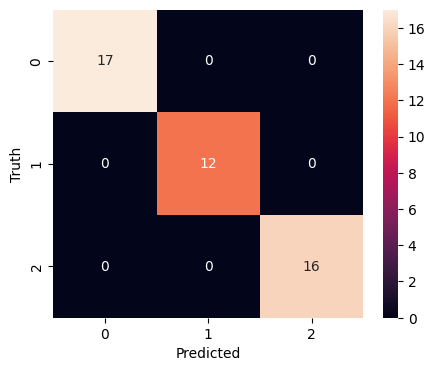

In [26]:
import seaborn as sn
from matplotlib import pyplot as plt
plt.figure(figsize=(5,4))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')

plt.ylabel('Truth')